### Daytum Course: Spatial Data Analytics

### Interactive Variogram Calculation, Modeling and Kriging

Here's an interactive workflow for calculating directional experimental variograms in 2D, modeling the variograms and applying the variogram models to calculate spatial estimation maps with kriging. 

* Wherever you see -999 values you must update with your own choices.
* When you make changes you must rerun the subsuquent code update the results.
* When you save your workflow and reload the interactive GUIs are reset so record you parameters before exiting, e.g., screen captures.

To complete this workflow you will:

1. **Load Spatial Data**, select from available datasets on Dr. Pyrcz's GitHub GeoDataSets repository or load your own dataset. Make sure that the following variables are consistent with the dataset.

    - feature and feature_units - the name of the feature in the dataframe and the units of the feature
    - vmin and vmax - the minimum and maximum values of the feature
    - xmin, xmax, ymin and ymax - the area of interest for plotting and building a kriged map

2. **Inspect the Posted Data**, visualize the data location map over the area of interest

    - make sure the area of interest covers the data and does not extend too far from data (i.e. extreme spatial extrapolation)
    - visually check for obvious sample bias with clustered samples over highs or lows
    - visually check for minimum lag spacing and possible major direction of continuity

3. **Declustering**,  apply cell beased declustering to the dataset.

    - calculate the declustered mean to apply as the stationary mean for simple kriging. Recall away from data the mean gets a weight of $1-\sum_{\alpha = 1}^{n} \lambda_{\alpha}$
    - calculate the declustered variance as the variogram sill and the maximum kriging estimation variance outside the range of all of the data (note ordinary kriging estimation variance can exceed the sill)
    - select reasonable parameters for declustering:

```python
find_minimizing_cell_size = -999
number_offsets = -999
number_cell_sizes = -999
min_cell_size = -999
max_cell_size = -999
```

4. **Calculate Directional Experimental Variograms**, set the directional variogram calculation search template parameters to find the major and minor directions of continuity and produce the more interpretable experimental variograms possible

    - use the interactive GUI to calculate the directional variograms

5. **Model the Directional Variograms**, use up to 2 nest variogram structures plus nugget if present to model the directional variogram 

    - rerun the code to update with a new experimental variogram and declustered variance / sill
    - use the interactive GUI to fit the directional variogram model

6. **Spatial Predictions with Kriging**, use the declustering results and variogram model with the data to calculate spatial estimation maps with kriging

    - rerun the code to update with a new variogram model and declustered stationary mean and variance / sill
    - set the kriging parameters, note vdmean is the declustered mean, you can reduce ndmax to speed up the run but may add limited search artifacts

```python
skmean = vdmean                            # simple kriging mean (used if simple kriging is selected below)
ktype = 0                                  # kriging type, 0 - simple, 1 - ordinary
radius = -999                              # search radius for neighbouring data
ndmin = -999; ndmax = -999                 # minimum and maximum data for an estimate
tmin =  -1.0e21; tmax = 1.0e21             # data trimming limits, set very small and large to not trim the data
```
7. **Spatial Prediction with Kriging - One Location with Uncertainty Model**, use the previous kriging estimate and kriging estimation variance maps to calculate the uncertainty model at a single location

    - select the location with this code:
```python
x = 500                                     # location to estimate
y = 500
```

#### Additional Resources

I have recorded lectures, code walkthroughs and comprehensive workflows for declustering:

* [spatial bias](https://www.youtube.com/watch?v=w0HgVibxpMQ&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=25)

* [declustering lecture](https://www.youtube.com/watch?v=rN0RKcTIVcI&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=26)

* [declustering in Python with GeostatsPy](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/GeostatsPy_declustering.ipynb)

and variogram calculation and modeling:

* [variogram introduction lecture](https://youtu.be/jVRLGOsnYuw)

* [variogram calculation lecture](https://youtu.be/mzPLicovE7Q)

* [variogram calculation search parameters](https://youtu.be/NE4xfhIHAm4)

* [variogram calculation in Python walkthough](https://www.youtube.com/watch?v=FugSEcCi2gI&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=36)

* [directional variogram calculation in Python walkthrough](https://www.youtube.com/watch?v=bryRCrtf3hk&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=37)

* [variogram interpretation lecture](https://www.youtube.com/watch?v=Li-Xzlu7hvs&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=38)

* [variogram modeling lecture](https://www.youtube.com/watch?v=-Bi63Y3u6TU&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=39)

* [variogram modeling in Python walkthrough](https://www.youtube.com/watch?v=bRj3HnEa1Z4&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=40)

* [experimental variogram calculation in Python with GeostatsPy](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/GeostatsPy_variogram_calculation.ipynb)

* [determination of major and minor spatial continuity directions in Python with GeostatsPy](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/GeostatsPy_spatial_continuity_directions.ipynb)

and kriging for spatial estimation:

* [kriging lecture](https://www.youtube.com/watch?v=CVkmuwF8cJ8&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=42)

* [simple kriging in Python walkthrough](https://www.youtube.com/watch?v=adkZAFKLY3s&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=44)

* [kriging Interactive Demonstration in Python with GeostatsPy](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/Interactive_Simple_Kriging.ipynb)

* [Complete by-Facies Kriging Workflow for Spatial Estimation in Python with GeostatsPy](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/GeostatsPy_kriging.ipynb)

Here's some more basic details on each topic for convenience. 

#### Spatial Continuity 

**Spatial Continuity** is the correlation between values over distance.

* No spatial continuity – no correlation between values over distance, random values at each location in space regardless of separation distance.

* Homogenous phenomenon have perfect spatial continuity, since all values as the same (or very similar) they are correlated. 

We need a statistic to quantify spatial continuity! A convenient method is the Semivariogram.

#### The Semivariogram

Function of difference over distance.

* The expected (average) squared difference between values separated by a lag distance vector (distance and direction), $h$:

\begin{equation}
\gamma(\bf{h}) = \frac{1}{2 N(\bf{h})} \sum^{N(\bf{h})}_{\alpha=1} (z(\bf{u}_\alpha) - z(\bf{u}_\alpha + \bf{h}))^2  
\end{equation}

where $z(\bf{u}_\alpha)$ and $z(\bf{u}_\alpha + \bf{h})$ are the spatial sample values at tail and head locations of the lag vector respectively.

* Calculated over a suite of lag distances to obtain a continuous function.

* the $\frac{1}{2}$ term converts a variogram into a semivariogram, but in practice the term variogram is used instead of semivariogram.
* We prefer the semivariogram because it relates directly to the covariance function, $C_x(\bf{h})$ and univariate variance, $\sigma^2_x$:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

Note the correlogram is related to the covariance function as:

\begin{equation}
\rho_x(\bf{h}) = \frac{C_x(\bf{h})}{\sigma^2_x}
\end{equation}

The correlogram provides of function of the $\bf{h}-\bf{h}$ scatter plot correlation vs. lag offset $\bf{h}$.  

\begin{equation}
-1.0 \le \rho_x(\bf{h}) \le 1.0
\end{equation}

#### Variogram Observations

The following are common observations for variograms that should assist with their practical use.

##### Observation \#1 - As distance increases, variability increase (in general).

This is common since in general, over greater distance offsets, there is often more difference between the head and tail samples.

In some cases, such as with spatial cyclicity of the hole effect variogram model the variogram may have negative slope over somelag distance intervals

Negative slopes at lag distances greater than half the data extent are often caused by too few pairs for a reliable variogram calculation

##### Observation \#2 - Calculated with over all possible pairs separated by lag vector, $\bf{𝐡}$.

We scan through the entire data set, searching for all possible pair combinations with all other data.  We then calculate the variogram as one half the expectation of squared difference between all pairs.

More pairs results in a more reliable measure.

##### Observation \#3 - Need to plot the sill to know the degree of correlation.

**Sill** is the variance, $\sigma^2_x$

Given stationarity of the variance, $\sigma^2_x$, and variogram $\gamma(\bf{h})$:

we can define the covariance function:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

The covariance measure is a measure of similarity over distance (the mirror image of the variogram as shown by the equation above).

Given a standardized distribution $\sigma^2_x = 1.0$, the covariance, $C_x(\bf{h})$, is equal to the correlogram, $\rho_x(\bf{h})$: 

\begin{equation}
\rho_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

##### Observation \#4 - The lag distance at which the variogram reaches the sill is know as the range.

At the range, knowing the data value at the tail location provides no information about a value at the head location of the lag distance vector.

##### Observation \#5 - The nugget effect, a discontinuity at the origin

Sometimes there is a discontinuity in the variogram at distances less than the minimum data spacing.  This is known as **nugget effect**.

The ratio of nugget / sill, is known as relative nugget effect (%). Modeled as a discontinuity with no correlation structure that at lags, $h \gt \epsilon$, an infinitesimal lag distance, and perfect correlation at $\bf{h} = 0$.
Caution when including nuggect effect in the variogram model as measurement error, mixing populations cause apparent nugget effect

This exercise demonstrates the semivariogram calculation with GeostatsPy. The steps include:

1. generate a 2D model with sequential Gaussian simulation
2. sample from the simulation
3. calculate and visualize experimental semivariograms

#### Variogram Calculation Parameters

The variogram calculation parameters include:

* **azimuth** is the azimuth of the lag vector

* **azimuth tolerance** is the maximum allowable departure from the azimuth (isotropic variograms are calculated with an azimuth tolerance of to 90.0)

* **unit lag distance** the size of the bins in lag distance, usually set to the minimum data spacing

* **lag distance tolerance** - the allowable tolerance in lage distance, commonly set to 50% of unit lag distanceonal smoothing

* **number of lags** - set based on the spatial extent of the dataset, we can typically calculate reliable variograms up to 1/2 the extent of the dataset

* **bandwidth** is the maximum offset allowable from the lag vector 


#### Variogram Modeling

Spatial continuity can be modeled with nested, positive definate variogram structures:

\begin{equation}
\Gamma_x(\bf{h}) = \sum_{i=1}^{nst} \gamma_i(\bf{h})
\end{equation}

where $\Gamma_x(\bf{h})$ is the nested variogram model resulting from the summation of $nst$ nested variograms  $\gamma_i(\bf{h})$.

The types of structure commonly applied include:

* spherical

* exponential

* gaussian

* nugget

Other less common models include:

* hole effect

* dampenned hole effect

* power law

these will not be covered here.

Each one of these variogram structures, $\gamma_i(\bf{h})$, is based on a geometric anisotropy model parameterized by the orientation and range in the major and minor directions.  In 2D this is simply an azimuth and ranges, $azi$, $a_{maj}$ and $a_{min}$. Note, the range in the minor direction (orthogonal to the major direction).

The geometric anisotropy model assumes that the range in all off-diagonal directions is based on an ellipse with the major and minor axes alligned with and set to the major and minor for the variogram.

\begin{equation}
\bf{h}_i = \sqrt{\left(\frac{r_{maj}}{a_{maj_i}}\right)^2 + \left(\frac{r_{maj}}{a_{maj_i}}\right)^2}  
\end{equation}

Therefore, if we know the major direction, range in major and minor directions, we may completely describe each nested componnent of the complete spatial continuity of the variable of interest, $i = 1,\dots,nst$.

Some comments on modeling nested variograms:

* we can capture nugget, short and long range continuity structures

* we rely on the geometric anisotropy model, so all structures must inform the same level of contribution (porportion of the sill) in all directions.

* the geometric anisotropy model is based on azimuth of the major direction of continuity, range in the major direction and range in the minor direction (orthogonal to the major direction).  The range is interpolated between the major and minor azimuths with a ellipse model

* we can vary the type of variogram, direction or azimuth of the major direction, and major and minor ranges by structure

#### Spatial Estimation

Consider the case of making an estimate at some unsampled location, $𝑧(\bf{u}_0)$, where $z$ is the property of interest (e.g. porosity etc.) and $𝐮_0$ is a location vector describing the unsampled location.

How would you do this given data, $𝑧(\bf{𝐮}_1)$, $𝑧(\bf{𝐮}_2)$, and $𝑧(\bf{𝐮}_3)$?

It would be natural to use a set of linear weights to formulate the estimator given the available data.

\begin{equation}
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha})
\end{equation}

We could add an unbiasedness constraint to impose the sum of the weights equal to one.  What we will do is assign the remainder of the weight (one minus the sum of weights) to the global average; therefore, if we have no informative data we will estimate with the global average of the property of interest.

\begin{equation}
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha}) + \left(1-\sum^{n}_{\alpha = 1} \lambda_{\alpha} \right) \overline{z}
\end{equation}

We will make a stationarity assumption, so let's assume that we are working with residuals, $y$. 

\begin{equation}
y^{*}(\bf{u}) = z^{*}(\bf{u}) - \overline{z}(\bf{u})
\end{equation}

If we substitute this form into our estimator the estimator simplifies, since the mean of the residual is zero.

\begin{equation}
y^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} y(\bf{u}_{\alpha})
\end{equation}

while satisfying the unbaisedness constraint.  

#### Kriging

Now the next question is what weights should we use?  

We could use equal weighting, $\lambda = \frac{1}{n}$, and the estimator would be the average of the local data applied for the spatial estimate. This would not be very informative.

We could assign weights considering the spatial context of the data and the estimate:

* **spatial continuity** as quantified by the variogram (and covariance function)
* **redundancy** the degree of spatial continuity between all of the available data with themselves 
* **closeness** the degree of spatial continuity between the avaiable data and the estimation location

The kriging approach accomplishes this, calculating the best linear unbiased weights for the local data to estimate at the unknown location.  The derivation of the kriging system and the resulting linear set of equations is available in the lecture notes.  Furthermore kriging provides a measure of the accuracy of the estimate!  This is the kriging estimation variance (sometimes just called the kriging variance).

\begin{equation}
\sigma^{2}_{E}(\bf{u}) = C(0) - \sum^{n}_{\alpha = 1} \lambda_{\alpha} C(\bf{u}_0 - \bf{u}_{\alpha})
\end{equation}

What is 'best' about this estimate? Kriging estimates are best in that they minimize the above estimation variance. 

#### Properties of Kriging

Here are some important properties of kriging:

* **Exact interpolator** - kriging estimates with the data values at the data locations
* **Kriging variance** can be calculated before getting the sample information, as the kriging estimation variance is not dependent on the values of the data nor the kriging estimate, i.e. the kriging estimator is homoscedastic. 
* **Spatial context** - kriging takes into account, furthermore to the statements on spatial continuity, closeness and redundancy we can state that kriging accounts for the configuration of the data and structural continuity of the variable being estimated.
* **Scale** - kriging may be generalized to account for the support volume of the data and estimate. We will cover this later.
* **Multivariate** - kriging may be generalized to account for multiple secondary data in the spatial estimate with the cokriging system. We will cover this later.
* **Smoothing effect** of kriging can be forecast. We will use this to build stochastic simulations later.

In this workflow we will explore methods to:

1. decluster the data to calculate a representative mean
2. interactively detect directionality from a spatial dataset
3. interactively calculate the directional variograms in the major and minor directions 
4. interactively build a consistent 2D model fit to the major and minor directions
5. apply the variogram model for building an spatial estimated map with simple kriging with the representative mean

Note, since we are using the variogram for estimation, we will not Gaussian transform the feature first.

* the sill of the variogram will be equal to the variance of the data and not necesssarily 1.0 as with the standard normal distribution.

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import geostatspy.GSLIB as GSLIB                       # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                 # GSLIB methods convert to Python    

C:\Users\pm27995\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pm27995\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\pm27995\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
%matplotlib inline
import os                                               # to set current working directory 
import sys                                              # supress output to screen for interactive variogram modeling
import io
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting
from matplotlib.pyplot import cm                        # color maps
from ipywidgets import interactive                      # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
from scipy import stats                                 # summary statistics
from statsmodels.stats.weightstats import DescrStatsW   # any weighted statistics
from scipy.stats import norm                            # Gaussian distribution
import math                                             # square root 
import warnings                                         # remove warnings
warnings.filterwarnings("ignore")

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  


#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see above) GSLIB executables in this directory or a location identified in the environmental variable *Path*.

In [3]:
#os.chdir("c:/PGE383")                                   # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. 

In [4]:
data = 2

if data == 0:
    df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/spatial_nonlinear_MV_facies_v6_sand_only.csv") # load from Prof. Pyrcz's GitHub repository
    df = df.rename(columns = {'Por':'Porosity'})            # rename feature(s)
    df = df.iloc[:,1:]                                      # remove first column
elif data == 1:
    df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_MV_biased.csv") # load from Prof. Pyrcz's GitHub repository
    df = df.rename(columns = {'Por':'Porosity'})            # rename feature(s)
    df['Porosity'] = df['Porosity']*100.0
    df = df.iloc[:,1:]                                      # remove first column
elif data == 2:
    df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/spatial_nonlinear_MV_facies_v3.csv") # load from Prof. Pyrcz's GitHub repository
    df = df.rename(columns = {'Por':'Porosity'})            # rename feature(s)
    df = df.iloc[:,1:] 
elif data == 3:
    df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv") # load from Prof. Pyrcz's GitHub repository
    df = df.rename(columns = {'Por':'Porosity'})            # rename feature(s) 
    df['Porosity'] = df['Porosity']*100.0
    df = df.iloc[:,1:] 
elif data == 4:
    df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/spatial_nonlinear_MV_facies_v5_sand_only.csv") # load from Prof. Pyrcz's GitHub repository
    df = df.rename(columns = {'Por':'Porosity'})            # rename feature(s) 
    df = df.iloc[:,1:] 
else:
    df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/spatial_nonlinear_MV_facies_v1.csv") # load from Prof. Pyrcz's GitHub repository
    df = df.rename(columns = {'Por':'Porosity'})            # rename feature(s)
    df = df.iloc[:,1:] 
    
df.head()                                               # we could also use this command for a table preview 

,X,Y,Porosity,Perm,AI,Facies
0,150.0,909.0,13.133413,485.231659,3848.226472,1.0
1,690.0,9.0,3.235632,138.238177,5673.521586,0.0
2,825.0,775.0,9.012557,317.338989,4370.886936,1.0
3,530.0,759.0,11.138872,414.252249,4003.754472,1.0
4,775.0,75.0,9.233079,350.924567,4134.272337,1.0


The features:

* **X** - x coordinate in meters
* **Y** - y coordinate in meters
* **Porosity** - rock porosity averaged over a specific rock unit from a vertical well
* **Perm** - rock permeability averaged (scaled up) over a specific rock unit from a vertical well 
* **AI** - acoustic impedance from a seismic cube assigned at a specific rock unit and at the location of a vertical well 
* **facies** - facies, 0 - shale, 1 - sandstone

Concerning facies:

We will work with all facies pooled together. I wanted to simplify this workflow and focus more on spatial continuity direction detection. Finally, by not using facies we do have more samples to support our statistical inference. Most often facies are essential in the subsurface model. Don't worry we will check if this is reasonable in a bit.   

You are welcome to repeat this workflow on a by-facies basis.  The following code could be used to build DataFrames ('df_sand' and 'df_shale') for each facies.

```p
df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index()  # copy only 'Facies' = sand records
df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index() # copy only 'Facies' = shale records
```

Let's look at summary statistics for all facies combined:

In [5]:
df.describe().transpose()                               # summary table of sand only DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
X,270.0,472.537037,288.917266,0.000000,225.000000,475.000000,745.000000,990.000000
Y,270.0,522.622222,277.643599,9.000000,309.000000,525.000000,769.000000,999.000000
Porosity,270.0,10.778590,3.665004,3.135247,7.909297,10.557808,13.119702,21.599413
Perm,270.0,406.286106,147.891654,138.238177,309.663433,408.150631,495.549617,798.263353
AI,270.0,4292.475630,433.786043,3630.239427,3981.691959,4192.107297,4491.224552,5701.203128
Facies,270.0,0.785185,0.411456,0.000000,1.000000,1.000000,1.000000,1.000000


#### Set the Model Parameters

See the the following model parameters:

* **xmin**, **xmax**, **ymin** and **ymax** - extents of the dataset for plotting
* **feature** and **feature_units** - feature of interest and associated units
* **vmin** and **vmax** - minimum and maximum of the feature of interest

In [6]:
xmin = 0.0; xmax = 1000.0                                # spatial extents in x and y
ymin = 0.0; ymax = 1000.0
feature = 'Porosity'; feature_units = '%'         # name and units of the feature of interest
vmin = 0.0; vmax = 22.0                                  # min and max of the feature of interest
cmap = plt.cm.inferno                                    # set the color map

#### Inspection of Posted Data

Data visualization is very useful to detect patterns. Our brains are very good at pattern detection. I promote quantitative methods and recognize issues with cognitive bias, but it is important to recognize the value is expert intepretation based on data visualization.

* Look for clustering of samples over regions of high or low values.

* This data visualization will also be important to assist with parameter selection for the variogram calculation search template.

Let's plot the location maps of the original feature and the normal score transforms of the feature.

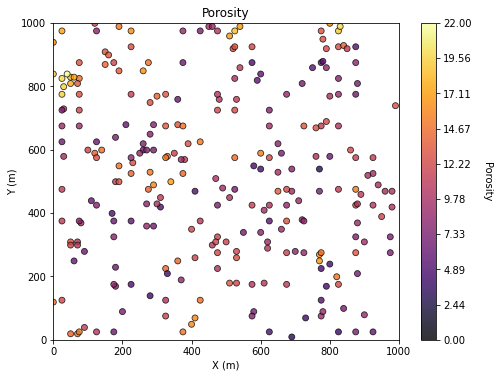

In [7]:
plt.subplot(111)                                        # location map of normal score transform of porosity
GSLIB.locmap_st(df,'X','Y',feature,0,1000,0,1000,vmin,vmax,feature,'X (m)','Y (m)',feature,cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.5, hspace=0.3)
plt.show()

Look carefully, and you'll notice the the spatial samples are more dense in the high porosity regions and lower in the low porosity regions.  There is preferential sampling.  We cannot use the naive statistics to represent this region.  We have to correct for the clustering of the samples in the high porosity regions. 

Let's try cell declustering. We can interpret that we will want to minimize the declustering mean and that get a sense of a range of possible optimal cell sizes based on 'an ocular' estimate of the largest average spacing in the sparsely sampled regions.   

Let's check out the declus program reimplimented from GSLIB.

In [8]:
geostats.declus

<function geostatspy.geostats.declus(df, xcol, ycol, vcol, iminmax, noff, ncell, cmin, cmax)>

We can now populate the parameters. The parameters are:

* **df** - DataFrame with the spatial dataset
* **xcol** - column with the x coordinate
* **ycol** - column with the y coordinate
* **vcol** - column with the feature value
* **iminmax** - if 1 use the cell size that minimizes the declustered mean, if 0 the cell size that maximizes the declustered mean
* **noff** - number of cell mesh offsets to average the declustered weights over
* **ncell** - number of cell sizes to consider (between the **cmin** and **cmax**)
* **cmin** - minimum cell size
* **cmax** - maximum cell size

We will run a very wide range of cell sizes, from 10m to 2,000m ('cmin' and 'cmax') and take the cell size that minimizes the declustered mean ('iminmax' = 1 minimize, and = 0 maximize). Multiple offsets (number of these is 'noff') uses multiple grid origins and averages the results to remove sensitivity to grid position.  The ncell is the number of cell sizes.

The output from this program is:

* **wts** - an array with the weigths for each data (they sum to the number of data, 1 indicates nominal weight)
* **cell_sizes** - an array with the considered cell sizes
* **dmeans** - an array with the declustered mean for each of the **cell_sizes**

The **wts** are the declustering weights for the selected (minimizing or maximizing cell size) and the **cell_sizes** and **dmeans** are plotted to build the diagnostic declustered mean vs. cell size plot (see below).

In [13]:
find_minimizing_cell_size = -999           # True - minimizing cell size, False - maximizing cell size
number_offsets = -999
number_cell_sizes = -999
min_cell_size = -999
max_cell_size = 999

wts, cell_sizes, dmeans = geostats.declus(df,'X','Y',feature,iminmax = int(find_minimizing_cell_size), 
                    noff= number_offsets,ncell=number_cell_sizes,cmin=min_cell_size,cmax=max_cell_size)
df['Wts'] = wts                            # add weights to the sample data DataFrame
df.head()                                  # preview to check the sample data DataFrame

plt.subplot(221)
GSLIB.locmap_st(df,'X','Y','Wts',xmin,xmax,ymin,ymax,0.0,2.0,'Declustering Weights','X (m)','Y (m)','Weights',cmap)

plt.subplot(222)
GSLIB.hist_st(df['Wts'],0.0,5.0,log=False,cumul=False,bins=40,weights=None,xlabel="Weights",title="Declustering Weights")
plt.ylim(0.0,250)

plt.subplot(223)
GSLIB.hist_st(df[feature],vmin,vmax,log=False,cumul=False,bins=40,weights=None,xlabel=feature,title="Naive " + feature)
plt.ylim(0.0,250)

plt.subplot(224)
GSLIB.hist_st(df[feature],vmin,vmax,log=False,cumul=False,bins=40,weights=df['Wts'],xlabel=feature,title="Declustered " + feature)
plt.ylim(0.0,250)

weighted_data = DescrStatsW(df['Porosity'].values, weights=df['Wts'], ddof=0)

vmean = np.average(df[feature].values)
vvar = np.var(df[feature].values)
vdmean = weighted_data.mean
vdvar = weighted_data.var

print('\n' + feature + ' Declustering Results:')
print('Stationary Mean: naive mean is ' + str(round(vmean,3))+', declustered mean is ' + str(round(vdmean,3))+'.')
print('Variance/Sill: naive variance is ' + str(round(vvar,3))+', declustered variance is ' + str(round(vdvar,3))+'.')

cor = (vmean-vdmean)/vmean
print('Declustering correction in mean of ' + str(round(cor*100,2)) +'%.')

# print('\nSummary statistics of the declustering weights:')
# print(stats.describe(wts))

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

ValueError: negative dimensions are not allowed

#### Compare the Naive and Declustered Cumulative Distribution Functions

Let's take a look at the naive and declustered feature cumulative distribution functions for a visual comparison.

In [ ]:
plt.subplot(111)                                        # plot original sand and shale porosity histograms
plt.hist(df[feature], facecolor='none',bins=np.linspace(vmin,vmax,1000),histtype="step",alpha=1.0,density=True,cumulative=True,edgecolor='black',label='Naive',linewidth=2)
plt.hist(df[feature],weights=df['Wts'],facecolor='none',bins=np.linspace(vmin,vmax,1000),histtype="step",alpha=1.0,density=True,cumulative=True,edgecolor='red',label='Declustered',linewidth=2)
plt.xlim([vmin,vmax]); plt.ylim([0,1.0])
plt.xlabel(feature + ' (' + feature_units + ')'); plt.ylabel('Cumulative Probability'); plt.title(feature)
plt.grid(True); plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

Now we are ready to calculate our experimental variograms.

#### Experimental Variograms

We can use the location maps to help determine good variogram calculation parameters. For example:

```p
tmin = -1.0e21; tmax = 1.0e21; 
lag_dist = -999; lag_tol = -999; nlag = -999; bandh = -999; azi = -999; atol = -999, isill = 1
```
* **tmin**, **tmax** are trimming limits - set to have no impact, no need to filter the data
* **lag_dist**, **lag_tol** are the lag distance, lag tolerance - set based on the common data spacing (100m) and tolerance as 100% of lag distance for additonal smoothing
* **nlag** is number of lags - set to extend just past 50 of the data extent
* **bandh** is the horizontal band width - set to have no effect
* **azi** is the azimuth -  it has not effect since we set atol, the azimuth tolerance, to 90.0
* **isill** is a boolean to standardize the distribution to a variance of 1 - it has no effect since the previous nscore transform sets the variance to 1.0

#### Dashboard for Interactive Experimental Variogram Calculation

Below we make a dashboard with the ipywidgets and matplotlib Python packages for calculating experimental variograms.

* allowing you to calculate the experimental variogram interactively while changing (and exploring) the search template parameters.

* first calculate the directional variogram(s)

In [ ]:
# interactive calculation of the experimental variogram
l = widgets.Text(value='                              Variogram Calculation Interactive Demonstration, Michael Pyrcz, Associate Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
lag = widgets.FloatSlider(min = 10, max = 500, value = 10, step = 10, description = 'lag',orientation='vertical',layout=Layout(width='90px', height='200px'),continuous_update = False)
lag.style.handle_color = 'gray'

lag_tol = widgets.FloatSlider(min = 5, max = 500, value = 5, step = 10, description = 'lag tolerance',orientation='vertical',layout=Layout(width='90px', height='200px'),continuous_update = False)
lag_tol.style.handle_color = 'gray'

nlag = widgets.IntSlider(min = 1, max = 100, value = 100, step = 1, description = 'number of lags',orientation='vertical',layout=Layout(width='90px', height='200px'),continuous_update = False)
nlag.style.handle_color = 'gray'

azi = widgets.FloatSlider(min = 0, max = 360, value = 0, step = 5, description = 'azimuth',orientation='vertical',layout=Layout(width='90px', height='200px'),continuous_update = False)
azi.style.handle_color = 'gray'

azi_tol = widgets.FloatSlider(min = 10, max = 90, value = 10, step = 5, description = 'azimuth tolerance',orientation='vertical',layout=Layout(width='120px', height='200px'),continuous_update = False)
azi_tol.style.handle_color = 'gray'

bandwidth = widgets.FloatSlider(min = 100, max = 2000, value = 2000, step = 100, description = 'bandwidth',orientation='vertical',layout=Layout(width='90px', height='200px'),continuous_update = False)
azi_tol.style.handle_color = 'gray'


ui1 = widgets.HBox([lag,lag_tol,nlag,azi,azi_tol,bandwidth],) # basic widget formatting    
ui = widgets.VBox([l,ui1],)

def f_make(lag,lag_tol,nlag,azi,azi_tol,bandwidth):     # function to take parameters, calculate variogram and plot
    global lags,gammas,npps,lags2,gammas2,npps2
    tmin = -9999.9; tmax = 9999.9
    lags, gammas, npps = geostats.gamv(df,"X","Y",feature,tmin,tmax,lag,lag_tol,nlag,azi,azi_tol,bandwidth,isill=0.0)
    lags2, gammas2, npps2 = geostats.gamv(df,"X","Y",feature,tmin,tmax,lag,lag_tol,nlag,azi+90.0,azi_tol,bandwidth,isill=0.0)
    
    plt.subplot(111)                                    # plot experimental variogram
    plt.scatter(lags,gammas,color = 'black',s = npps*0.03,label = 'Major Azimuth ' +str(azi), alpha = 0.8)
    plt.scatter(lags2,gammas2,color = 'red',s = npps*0.03,label = 'Minor Azimuth ' +str(azi+90.0), alpha = 0.8)
    plt.plot([0,2000],[vdvar,vdvar],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    if azi_tol < 90.0:
        plt.title('Directional ' + feature + ' Variogram - Azi. ' + str(azi) + ', Azi. Tol.' + str(azi_tol))
    else: 
        plt.title('Omni Directional ' + feature + ' Variogram ')
    plt.xlim([0,1000]); plt.ylim([0,1.5*vdvar])
    plt.legend(loc="lower right")
    plt.grid(True)
    
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.0, wspace=0.3, hspace=0.3)
    plt.show()
    
    return
    
# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(f_make, {'lag':lag,'lag_tol':lag_tol,'nlag':nlag,'azi':azi,'azi_tol':azi_tol,'bandwidth':bandwidth})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

### Interactive Variogram Calculation Demonstration

* calculate omnidirectional and direction experimental variograms 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### The Problem

Calculate interpretable experimental variograms for sparse, irregularly-space spatial data. Note, size of the experimental point is scaled by the number of pairs.

* **azimuth** is the azimuth of the lag vector

* **azimuth tolerance** is the maximum allowable departure from the azimuth

* **unit lag distance** the size of the bins in lag distance

* **lag distance tolerance** - the allowable tolerance in lage distance

* **number of lags** - number of lags in the experimental variogram

* **bandwidth** - maximum departure from the lag vector

In [ ]:
display(ui, interactive_plot)                           # display the interactive plot

#### Dashboard for Interactive Variogram Modeling

Below we make a dashboard with the ipywidgets and matplotlib Python packages for modeling experimental variograms.

* fit the directional variogram(s)

In [10]:
# interactive calculation of the sample set (control of source parametric distribution and number of samples)
l = widgets.Text(value='                              Variogram Modeling, Michael Pyrcz, Associate Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
nug = widgets.FloatSlider(min = 0, max = 1.0, value = 0.0, step = 0.01, description = r'$c_{nug}$',
                          orientation='vertical',layout=Layout(width='60px', height='200px'),
                          readout_format='.0%',continuous_update = False)
nug.style.handle_color = 'gray'
it1 = widgets.Dropdown(options=['Spherical', 'Exponential', 'Gaussian'],value='Spherical',
    description='$1^{st}$ structure:',disabled=False,layout=Layout(width='200px', height='30px'),continuous_update=False)
c1 = widgets.FloatSlider(min=0.0, max = 1.0, value = 0.1,step=0.01,description = r'$c_{1}$',
                          orientation='vertical',layout=Layout(width='60px', height='200px'),
                          readout_format='.0%',continuous_update = False)
c1.style.handle_color = 'gray'
hmaj1 = widgets.FloatSlider(min=0.01, max = 10000.0, value = 0.01, step = 25.0, description = r'$a_{maj_1}$',orientation='vertical',layout=Layout(width='60px', height='200px'),continuous_update=False)
hmaj1.style.handle_color = 'black'
hmin1 = widgets.FloatSlider(min = 0.01, max = 10000.0, value = 0.01, step = 25.0, description = r'$a_{min_1}$',orientation='vertical',layout=Layout(width='60px', height='200px'),continuous_update=False)
hmin1.style.handle_color = 'red'

it2 = widgets.Dropdown(options=['Spherical', 'Exponential', 'Gaussian'],value='Spherical',
    description='$2^{nd}$ structure:',disabled=False,layout=Layout(width='200px', height='30px'))
c2 = widgets.FloatSlider(min=0.0, max = 1.0, value = 0.0,step=0.01,description = r'$c_{2}$',orientation='vertical',
                          layout=Layout(width='60px', height='200px'),continuous_update=False,
                          readout_format='.0%')
c2.style.handle_color = 'gray'
hmaj2 = widgets.FloatSlider(min=0.01, max = 10000.0, value = 0.01, step = 100.0, description = r'$a_{maj_2}$',
                          orientation='vertical',layout=Layout(width='60px', height='200px'),continuous_update=False,)
hmaj2.style.handle_color = 'black'
hmin2 = widgets.FloatSlider(min = 0.01, max = 10000.0, value = 0.01, step = 100.0, description = r'$a_{min_2}$',orientation='vertical',layout=Layout(width='60px', height='200px'),continuous_update=False)
hmin2.style.handle_color = 'red'

ui1 = widgets.HBox([nug,it1,c1,hmaj1,hmin1,it2,c2,hmaj2,hmin2],)                   # basic widget formatting   
#ui2 = widgets.HBox([it2,c2,hmaj2,hmin2],)                   # basic widget formatting   
ui = widgets.VBox([l,ui1],)

def convert_type(it):
    if it == 'Spherical': 
        return 1
    elif it == 'Exponential':
        return 2
    else: 
        return 3

def f_make(nug,it1,c1, hmaj1, hmin1, it2, c2, hmaj2, hmin2):                       # function to take parameters, make sample and plot
    nug = nug *  vdvar; c1 = c1 * vdvar; c2 = c2 * vdvar
#     text_trap = io.StringIO()
#     sys.stdout = text_trap
    
    it1 = convert_type(it1); it2 = convert_type(it2)
    if c2 > 0.0:
        nst = 2
    else:
        nst = 1
    print('Ignore this warning, since we are kriging the original feature the sill is not one:')
    vario = GSLIB.make_variogram(nug,nst,it1,c1,0.0,hmaj1,hmin1,it2,c2,0.0,hmaj2,hmin2) # make model object
    nlag = 100; xlag = 10;                                     
    index_maj,h_maj,gam_maj,cov_maj,ro_maj = geostats.vmodel(nlag,xlag,0.0,vario)   # project the model in the major azimuth                                                  # project the model in the 135 azimuth
    index_min,h_min,gam_min,cov_min,ro_min = geostats.vmodel(nlag,xlag,90.0,vario)   

    plt.subplot(111)                                    # plot experimental variogram
    plt.scatter(lags,gammas,color = 'black',s = npps*0.03,label = 'Major Azimuth ' +str(azi.value), alpha = 0.8)
    plt.plot(h_maj,gam_maj,color = 'black')
    plt.scatter(lags2,gammas2,color = 'red',s = npps*0.03,label = 'Minor Azimuth ' +str(azi.value+90.0), alpha = 0.8)
    plt.plot(h_min,gam_min,color = 'red')
    plt.plot([0,2000],[vdvar,vdvar],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    if azi_tol.value < 90.0:
        plt.title('Directional ' + feature + ' Variogram - Azi. ' + str(azi.value) + ', Azi. Tol.' + str(azi_tol.value))
    else: 
        plt.title('Omni Directional ' + feature + ' Variogram ')
    plt.xlim([0,1000]); plt.ylim([0,1.5*vdvar])
    plt.legend(loc="lower right")
    plt.grid(True)
    
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.5, wspace=0.3, hspace=0.3)
    plt.show()
    
# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(f_make, {'nug':nug, 'it1':it1,'c1':c1, 'hmaj1':hmaj1, 'hmin1':hmin1, 'it2':it2, 'c2':c2, 'hmaj2':hmaj2, 'hmin2':hmin2})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

### Interactive Nested Variogram Modeling Demostration

* select the nested structures and their types, contributions and major and minor ranges 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### The Problem

Fit a positive definite variogram model based on the addition of multiple structures each describing spatial components of the feature variance 

* **nug**: nugget effect

* **c1 / c2**: contributions of the sill, in percentage of the sill calculated from the declustered variance

* **hmaj1 / hmaj2**: range in the major direction

* **hmin1 / hmin2**: range in the minor direction

In [11]:
display(ui, interactive_plot)                           # display the interactive plot

Output(outputs=({'output_type': 'error', 'ename': 'NameError', 'evalue': "name 'vdvar' is not defined", 'trace…

#### Kriging to Calculate Spatial Estimates

Now let's build spaital maps with our data and modeled variogram.

We require a grid for our map. 

* first we specify the extents of the grid with xmin, xmax, ymin and ymax.

* then we specify the number of grid cells in x and y with nx and ny

* then we calculate the required size of the cells in each direction, xsiz and ysiz, and the cell center of the grid origin, xmin and ymin

In [12]:
nx = 100; ny = 100                           # number of cells
xsiz = (xmax-xmin)/nx; xmn = xmin + xsiz*0.5 # calculation for the size of each cell and the cell origin
ysiz = (ymax-ymin)/ny; ymn = ymin + ysiz*0.5

Perform kriging with specific kriging settings.

* **skmean** - if performing simple kriging this is the stationary mean, use the declustered mean, vdmean
* **ktype** - kriging type, 0 = simple kriging and 1 = ordinary kriging
* **ndmin, ndmax** - the minimum and maximum number of data for each kriging estimate, reduce ndmax to speed up the calculation, increase ndmin to avoid making predictions with too few data
* **tmin, tmax** - the trimming limits to remove data outliers

We look at the kriging estimates and the kriging (estimation) variance.

In [ ]:
skmean = vdmean                            # simple kriging mean (used if simple kriging is selected below)
ktype = -999                               # kriging type, 0 - simple, 1 - ordinary
radius = -999                              # search radius for neighbouring data
ndmin = -999; ndmax = -999                 # minimum and maximum data for an estimate
tmin =  -1.0e21; tmax = 1.0e21             # data trimming limits, set very small and large to not trim the data

print('Ignore this warning, since we are kriging the original feature the sill is not one:')
vario = GSLIB.make_variogram(nug=nug.value*vdvar,nst=2,
         it1=convert_type(it1.value),cc1=c1.value*vdvar,azi1=azi.value,hmaj1=hmaj1.value,hmin1 = hmin1.value,
         it2=convert_type(it2.value),cc2=c2.value*vdvar,azi2=azi.value,hmaj2=hmaj2.value,hmin2 = hmin2.value) # variogram

kmap, vmap = geostats.kb2d(df,'X','Y',feature,tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,1,1,
         ndmin,ndmax,radius,ktype,skmean,vario)

plt.subplot(121)
GSLIB.pixelplt_st(kmap,xmin,xmax,ymin,ymax,xsiz,vmin,vmax,'Kriging Estimate','X(m)','Y(m)',feature + ' (' + feature_units + ')',cmap)
plt.scatter(df['X'],df['Y'],marker='o',s=10,c=df[feature].values,edgecolor='black',cmap=cmap)

plt.subplot(122)
GSLIB.pixelplt_st(vmap,xmin,xmax,ymin,ymax,xsiz,vmin,vmax,'Kriging Variance','X(m)','Y(m)',feature + ' kriging variance (' + feature_units + '^2)',cmap)
plt.scatter(df['X'],df['Y'],marker='o',s=10,color='white',edgecolor='black')


plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.3, hspace=0.3)
plt.show()

#### Spatial Predictions with Kriging

Select a location and observe the kriging estimate and estimation variance.

* We assume Gaussian distribution for the uncertainty parameterized by a mean of the kriging estimate and variance of the kriging estimation variance.

In [ ]:
x = -999                                    # location to estimate
y = -999

ix = geostats.getindex(nx,xmn,xsiz,x); iy = ny-geostats.getindex(ny,ymn,ysiz,y)-1

plt.subplot(121)
GSLIB.pixelplt_st(kmap,xmin,xmax,ymin,ymax,xsiz,vmin,vmax,'Kriging Estimate','X(m)','Y(m)',feature + ' (' + feature_units + ')',cmap)
plt.scatter(df['X'],df['Y'],marker='o',s=5,c=df[feature].values,edgecolor='black')
plt.scatter(x,y,marker='o',s=50,color='white',edgecolor='black',linewidths=3)

kest = kmap[iy,ix]; kerr = vmap[iy,ix]
pvalues = np.linspace(0.01,0.99,100)
print('Kriging Estimate = ' + str(round(kest,2)) + ', Kriging Estimation Variance = ' + str(round(kerr,2)))

plt.subplot(122)
plt.hist(norm.rvs(loc=kest,scale=math.sqrt(kerr),size = 1000),bins=np.linspace(vmin,vmax,40),color='darkorange',edgecolor='black',density=True)
plt.xlabel(feature + ' Estimate and Uncertainty (' + feature_units + ') at Location (' + str(x) + ',' + str(y) + ')'); plt.ylabel('Probability')
plt.title('Kriging Estimate and Kriging Variance-based Uncertainty')
plt.xlim([vmin,vmax])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.3, hspace=0.3)
plt.show()

#### Comments

This was a basic demonstration / exercise of variogram calculation and modeling for spatial continuity analysis and spatial estimation with kriging. Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) 

<i>&copy; Copyright daytum 2021. All Rights Reserved</i>